<a href="https://colab.research.google.com/github/surajrasaq/suraj/blob/master/maladrin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
from keras.preprocessing import image

from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# from google.colab import drive
# drive.mount ('/content/drive')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import zipfile
# import tarfile
with zipfile.ZipFile('/content/drive/My Drive/cell_images.zip', 'r') as zip_ref:
     zip_ref.extractall()

# with tarfile.open('./cell_images.zip', "r:gz") as zip_file:
#     zip_file.extractall()

In [4]:
base_dir = './cell_images'
train_dir = os.path.join(base_dir, 'training_set')
test_dir = os.path.join(base_dir, 'test_set')

In [5]:
os.listdir(base_dir)

['single_prediction', 'test_set', 'training_set', '.DS_Store', 'test_image']

In [6]:
training_set = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
seed=101,
image_size=(200, 200),
batch_size=32)

Found 20024 files belonging to 2 classes.


In [7]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
test_dir,
seed=101,
image_size=(200, 200),
batch_size=32)

Found 7534 files belonging to 2 classes.


In [8]:
checkpoint_filepath = '/cell_images/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='loss',
    mode='min',
    save_best_only=True)

callbacks = [
             EarlyStopping(patience=2),
             model_checkpoint_callback,
]


In [9]:
class_names = training_set.class_names

In [10]:
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(200,200,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)


In [11]:
model = Sequential([
    data_augmentation,
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])


In [12]:
model.compile(optimizer='adam',
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

history = model.fit(training_set,validation_data=validation_set, epochs=600,callbacks=callbacks)



Epoch 1/600


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:5017: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


626/626 [==============================] - 57s 86ms/step - loss: 0.6932 - binary_accuracy: 0.5006 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
INFO:tensorflow:Assets written to: /cell_images/checkpoint/assets
Epoch 2/600
626/626 [==============================] - 54s 86ms/step - loss: 0.6932 - binary_accuracy: 0.4990 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
INFO:tensorflow:Assets written to: /cell_images/checkpoint/assets
Epoch 3/600
626/626 [==============================] - 54s 86ms/step - loss: 0.6932 - binary_accuracy: 0.4987 - val_loss: 0.6932 - val_binary_accuracy: 0.5000


In [13]:
metrics_df = pd.DataFrame(history.history)

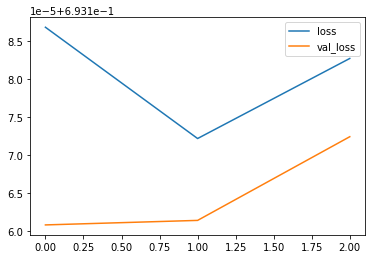

In [14]:
metrics_df[["loss","val_loss"]].plot();


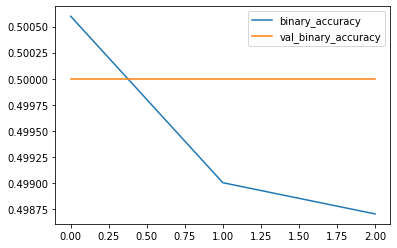

In [15]:
metrics_df[["binary_accuracy","val_binary_accuracy"]].plot()

In [16]:
loss, accuracy = model.evaluate(validation_set)
print('Accuracy on test dataset:', accuracy)

236/236 [==============================] - 11s 46ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Accuracy on test dataset: 0.5


In [17]:
test_image = image.load_img('./cell_images/test_image/infected.png', target_size=(200, 200))

In [18]:
test_image = image.img_to_array(test_image)

In [19]:
test_image = np.expand_dims(test_image, axis=0)

In [20]:
prediction = model.predict(test_image)

In [21]:
if prediction[0][0]>0.5:
  print(" its paratized")
else:
   print(" its uninfected")


 its paratized


In [22]:
test_image2 = image.load_img('./cell_images/test_image/not_infected.png', target_size=(200, 200))

In [23]:
test_image2 = np.expand_dims(test_image2, axis=0)

In [24]:
prediction = model.predict(test_image2)

In [25]:
if prediction[0][0]>0.5:
  print(" its Ununfected")
else:
   print(" its Paratized")

 its Ununfected
